In [100]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [101]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [102]:
print(train_data)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave   NaN      Reg  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [103]:
print(test_data.shape)
print(train_data.shape) 

(1459, 80)
(1460, 81)


In [104]:
print(test_data.columns)
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
MissingData_Train=train_data.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
MissingData_Test=test_data.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
print(MissingData_Train)
print(MissingData_Test)

        Variables  Missing Values
0              Id               0
1      MSSubClass               0
2        MSZoning               0
3     LotFrontage             259
4         LotArea               0
..            ...             ...
76         MoSold               0
77         YrSold               0
78       SaleType               0
79  SaleCondition               0
80      SalePrice               0

[81 rows x 2 columns]
        Variables  Missing Values
0              Id               0
1      MSSubClass               0
2        MSZoning               4
3     LotFrontage             227
4         LotArea               0
..            ...             ...
75        MiscVal               0
76         MoSold               0
77         YrSold               0
78       SaleType               1
79  SaleCondition               0

[80 rows x 2 columns]


In [107]:
(train_data["LotFrontage"].isnull().sum()/train_data["LotFrontage"].count())*100

21.56536219816819

In [108]:
train_data.select_dtypes("float")

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [109]:
for colums_name in train_data.select_dtypes("object").columns:          
       print(train_data[colums_name].unique())                          

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng

In [110]:
priority_order = {
    'Street': ['Pave', 'Grvl'],
    'Alley': ['Pave', 'Grvl',"NAN"],
    'LotShape': ["Reg" , "IR1" ,"IR2" , "IR3"],
    "LandContour":["LvlNear","Bnk","HLS","Low"],
    "Utilities":['AllPub','NoSeWa'],
    "LotConfig":["FR3",'FR2','Inside','Corner','CulDSac'],
    "LandSlope":['Gtl','Mod','Sev'],
    "ExterQual":["Ex","Gd","TA","Fa","Po"],
    "ExterCond":["Ex","Gd","TA","Fa","Po"],
    "BsmtQual":["Ex","Gd","TA","Fa","Po","NAN"],
    "BsmtCond":["Ex","Gd","TA","Fa","Po","NAN"],
    "BsmtFinType1":["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NAN"],
    "BsmtFinType2":["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NAN"],
    "HeatingQC":["Ex","Gd","TA","Fa","Po"],
    "CentralAir":["Y","N"],
    "KitchenQual":["Ex","Gd","TA","Fa","Po"],
    "FireplaceQu":["Ex","Gd","TA","Fa","Po","NAN"],
    "GarageFinish":["Fin","RFn","Unf","NAN"],
    "GarageQual":["Ex","Gd","TA","Fa","Po","NAN"],
    "GarageCond":["Ex","Gd","TA","Fa","Po"],
    "PavedDrive":["Y","P","N"],
    "PoolQC":["Ex","Gd","TA","Fa","NAN"],
}

In [111]:
for column, order in priority_order.items():
    train_data[column] = train_data[column].astype('category')
    train_data[column] = train_data[column].cat.set_categories(order, ordered=True)
    train_data[column] = train_data[column].cat.codes 

print(train_data.head())

for column, order in priority_order.items():
    test_data[column] = test_data[column].astype('category')
    test_data[column] = test_data[column].cat.set_categories(order, ordered=True)
    test_data[column] = test_data[column].cat.codes 

print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape   
0   1          60       RL         65.0     8450       0     -1         0  \
1   2          20       RL         80.0     9600       0     -1         0   
2   3          60       RL         68.0    11250       0     -1         1   
3   4          70       RL         60.0     9550       0     -1         1   
4   5          60       RL         84.0    14260       0     -1         1   

   LandContour  Utilities  ...  PoolArea  PoolQC Fence MiscFeature MiscVal   
0           -1          0  ...         0      -1   NaN         NaN       0  \
1           -1          0  ...         0      -1   NaN         NaN       0   
2           -1          0  ...         0      -1   NaN         NaN       0   
3           -1          0  ...         0      -1   NaN         NaN       0   
4           -1          0  ...         0      -1   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   200

In [112]:
train_data.select_dtypes("object")

,MSZoning,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Foundation,BsmtExposure,Heating,Electrical,Functional,GarageType,Fence,MiscFeature,SaleType,SaleCondition
0,RL,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,...,PConc,No,GasA,SBrkr,Typ,Attchd,NaN,NaN,WD,Normal
1,RL,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,...,CBlock,Gd,GasA,SBrkr,Typ,Attchd,NaN,NaN,WD,Normal
2,RL,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,...,PConc,Mn,GasA,SBrkr,Typ,Attchd,NaN,NaN,WD,Normal
3,RL,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,...,BrkTil,No,GasA,SBrkr,Typ,Detchd,NaN,NaN,WD,Abnorml
4,RL,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,...,PConc,Av,GasA,SBrkr,Typ,Attchd,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,...,PConc,No,GasA,SBrkr,Typ,Attchd,NaN,NaN,WD,Normal
1456,RL,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,...,CBlock,No,GasA,SBrkr,Min1,Attchd,MnPrv,NaN,WD,Normal
1457,RL,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,...,Stone,No,GasA,SBrkr,Typ,Attchd,GdPrv,Shed,WD,Normal
1458,RL,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,...,CBlock,Mn,GasA,FuseA,Typ,Attchd,NaN,NaN,WD,Normal


In [113]:
train_data.select_dtypes("int64")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [115]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   Alley          1459 non-null   int8   
 7   LotShape       1459 non-null   int8   
 8   LandContour    1459 non-null   int8   
 9   Utilities      1459 non-null   int8   
 10  LotConfig      1459 non-null   int8   
 11  LandSlope      1459 non-null   int8   
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [116]:
from sklearn.preprocessing import LabelEncoder
train_data.select_dtypes("object")
label_columns = train_data.select_dtypes("object")
label_encoder = LabelEncoder()

for col in label_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

print(train_data)

test_data.select_dtypes("object")
label_columns = test_data.select_dtypes("object")
label_encoder = LabelEncoder()

for col in label_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])




        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley   
0        1          60         3         65.0     8450       0     -1  \
1        2          20         3         80.0     9600       0     -1   
2        3          60         3         68.0    11250       0     -1   
3        4          70         3         60.0     9550       0     -1   
4        5          60         3         84.0    14260       0     -1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       0     -1   
1456  1457          20         3         85.0    13175       0     -1   
1457  1458          70         3         66.0     9042       0     -1   
1458  1459          20         3         68.0     9717       0     -1   
1459  1460          20         3         75.0     9937       0     -1   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence   
0            0           -1          0  ...        

In [117]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


### Missing Values 

In [118]:
MissingData_Train=train_data.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
MissingData_Test=test_data.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
print(MissingData_Train)
print(MissingData_Test)

        Variables  Missing Values
0              Id               0
1      MSSubClass               0
2        MSZoning               0
3     LotFrontage             259
4         LotArea               0
..            ...             ...
76         MoSold               0
77         YrSold               0
78       SaleType               0
79  SaleCondition               0
80      SalePrice               0

[81 rows x 2 columns]
        Variables  Missing Values
0              Id               0
1      MSSubClass               0
2        MSZoning               0
3     LotFrontage             227
4         LotArea               0
..            ...             ...
75        MiscVal               0
76         MoSold               0
77         YrSold               0
78       SaleType               0
79  SaleCondition               0

[80 rows x 2 columns]


In [119]:
# Burada train ve test csv değerlerindeki eksik verileri ortalama değerlerle doldurduk.
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())


In [120]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [121]:
train_data.head(1000)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.000000,8450,0,-1,0,-1,0,...,0,-1,4,4,0,2,2008,8,4,208500
1,2,20,3,80.000000,9600,0,-1,0,-1,0,...,0,-1,4,4,0,5,2007,8,4,181500
2,3,60,3,68.000000,11250,0,-1,1,-1,0,...,0,-1,4,4,0,9,2008,8,4,223500
3,4,70,3,60.000000,9550,0,-1,1,-1,0,...,0,-1,4,4,0,2,2006,8,0,140000
4,5,60,3,84.000000,14260,0,-1,1,-1,0,...,0,-1,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,50,3,51.000000,4712,0,-1,1,-1,0,...,0,-1,2,4,0,8,2006,8,0,121600
996,997,20,3,70.049958,10659,0,-1,1,-1,0,...,0,-1,4,4,0,1,2006,0,4,136500
997,998,20,3,70.049958,11717,0,-1,1,-1,0,...,0,-1,4,4,0,2,2009,8,4,185000
998,999,30,4,60.000000,9786,0,-1,0,-1,0,...,0,-1,4,4,0,5,2006,8,4,91000


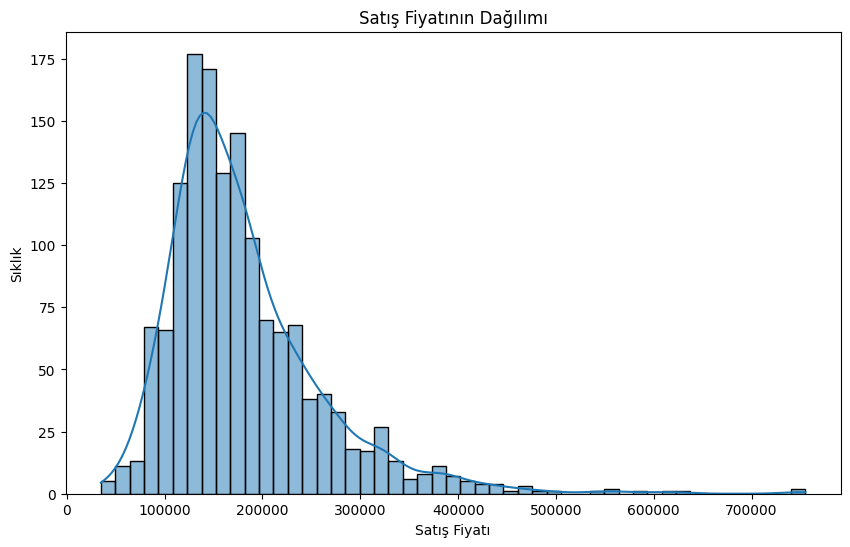

In [122]:
# Veri analizi ve görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title("Satış Fiyatının Dağılımı")
plt.xlabel("Satış Fiyatı")
plt.ylabel("Sıklık")
plt.show()

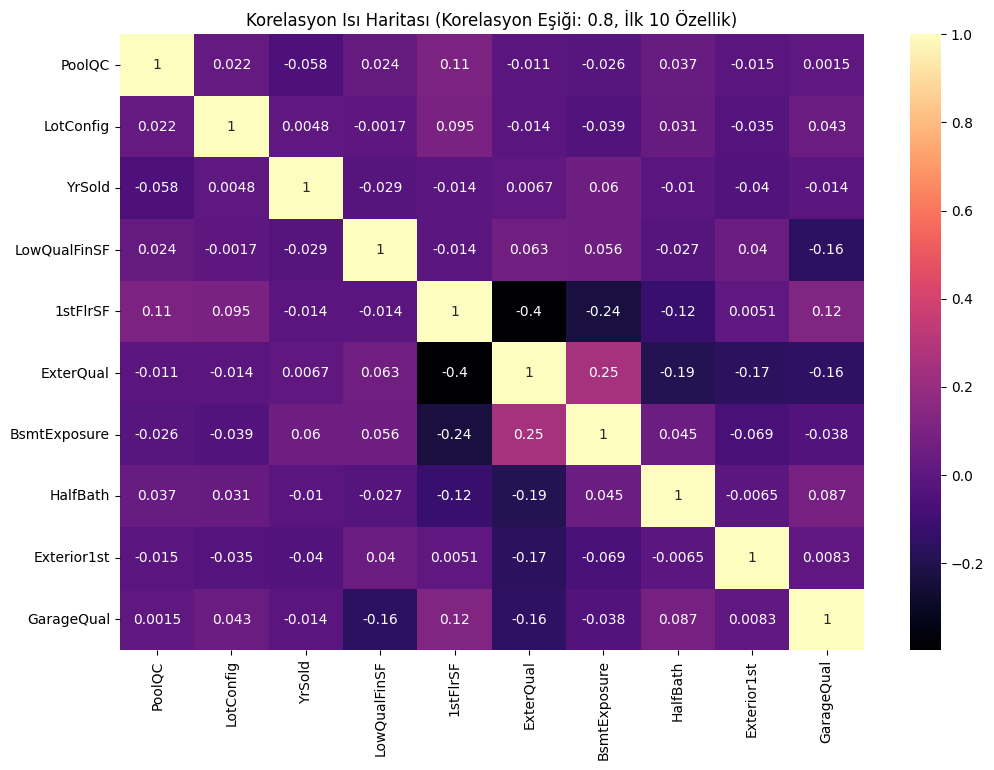

In [123]:
threshold = 0.8
correlation_matrix = train_data.corr()
high_corr_features = correlation_matrix[abs(correlation_matrix) > threshold]

# İlk 10 yüksek korelasyona sahip özelliklerin isimlerini seçiyoruz
top_n = 10
top_corr_feature_names = []
for col in high_corr_features.columns:
    top_corr_feature_names.extend(high_corr_features[high_corr_features[col] == True].index.tolist())
top_corr_feature_names = list(set(top_corr_feature_names))[:top_n]

# Seçilen özellikler üzerinden korelasyon matrisini oluşturuyoruz
top_corr_matrix = train_data[top_corr_feature_names].corr()

# Isı haritasını oluşturuyoruz
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, cmap='magma', annot=True)
plt.title(f"Korelasyon Isı Haritası (Korelasyon Eşiği: {threshold}, İlk {top_n} Özellik)")
plt.show()

 

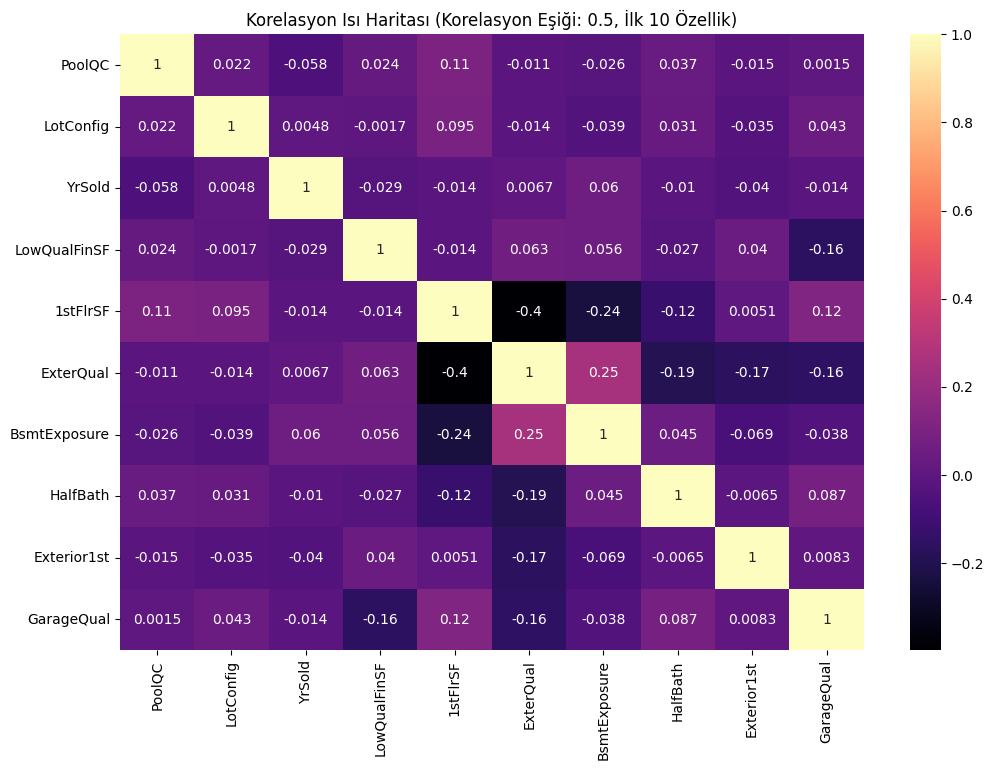

In [124]:
threshold = 0.5
correlation_matrix = test_data.corr()
high_corr_features = correlation_matrix[abs(correlation_matrix) > threshold]

# İlk 10 yüksek korelasyona sahip özelliklerin isimlerini seçiyoruz
top_n = 10
top_corr_feature_names = []
for col in high_corr_features.columns:
    top_corr_feature_names.extend(high_corr_features[high_corr_features[col] == True].index.tolist())
top_corr_feature_names = list(set(top_corr_feature_names))[:top_n]

# Seçilen özellikler üzerinden korelasyon matrisini oluşturuyoruz
top_corr_matrix = train_data[top_corr_feature_names].corr()

# Isı haritasını oluşturuyoruz
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, cmap='magma', annot=True)
plt.title(f"Korelasyon Isı Haritası (Korelasyon Eşiği: {threshold}, İlk {top_n} Özellik)")
plt.show()

### Model Train

In [125]:

X = train_data.drop(['Id', 'SalePrice'], axis=1)
y = train_data['SalePrice']

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [127]:
# Veriyi eğitim ve test olarak ayır
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [129]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(79,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1) 
])
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', keras.metrics.RootMeanSquaredError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=256, verbose=0, callbacks=[early_stopping, model_checkpoint])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               10240     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 21249 (83.00 KB)
Trainable params: 21249

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
best_model = keras.models.load_model('best_model.h5')

In [131]:
test_rmse = best_model.evaluate(X_val, y_val, verbose=0)[2]  # İndeks 2, RMSE metriğiyle ilgilidir
print("Doğrulama Kümesinde En İyi Model RMSE:", test_rmse)

Doğrulama Kümesinde En İyi Model RMSE: 32825.58203125
